[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_number_plus_regression.ipynb)

In [1]:
!pip install chainer

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainer

In [255]:
from chainer.datasets import split_dataset_random

x = np.random.rand(1000) * 10
x = x.reshape(int(len(x)/2), 2)
x = np.array(x, dtype=np.int32)

x = np.array(x, dtype=np.float32)
y = x[:,0] + x[:, 1]
y = y.reshape(len(y),1)
y = np.array(y, dtype=np.float32)
print(x.shape)
print(y.shape)

dataset = list(zip(x, y))
train, test = split_dataset_random(dataset, int(len(dataset)*0.7))

print(type(train))       #chainer.datasets.sub_dataset.SubDataset
print(type(train[0]))    #tuple
print(type(train[0][0])) #numpy.ndarray
print(type(train[0][1])) #numpy.ndarray

sample_x = pd.DataFrame(x)
sample_x.describe()
print(x)


(500, 2)
(500, 1)
<class 'chainer.datasets.sub_dataset.SubDataset'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[8. 4.]
 [8. 9.]
 [4. 2.]
 [7. 9.]
 [0. 7.]
 [6. 9.]
 [4. 1.]
 [7. 7.]
 [8. 3.]
 [0. 7.]
 [8. 0.]
 [8. 2.]
 [2. 7.]
 [1. 4.]
 [4. 6.]
 [9. 8.]
 [3. 4.]
 [1. 9.]
 [4. 9.]
 [3. 1.]
 [9. 4.]
 [6. 3.]
 [8. 5.]
 [0. 4.]
 [4. 1.]
 [9. 9.]
 [9. 4.]
 [3. 2.]
 [5. 8.]
 [5. 0.]
 [0. 1.]
 [9. 5.]
 [8. 5.]
 [4. 1.]
 [2. 2.]
 [6. 0.]
 [1. 8.]
 [5. 5.]
 [0. 8.]
 [1. 5.]
 [2. 0.]
 [4. 4.]
 [8. 4.]
 [1. 2.]
 [7. 6.]
 [9. 0.]
 [6. 6.]
 [1. 1.]
 [7. 4.]
 [2. 2.]
 [1. 0.]
 [4. 4.]
 [7. 1.]
 [5. 8.]
 [0. 0.]
 [3. 7.]
 [8. 2.]
 [1. 1.]
 [6. 1.]
 [3. 9.]
 [6. 0.]
 [1. 1.]
 [7. 3.]
 [6. 1.]
 [3. 2.]
 [1. 3.]
 [7. 7.]
 [6. 0.]
 [1. 4.]
 [1. 7.]
 [9. 9.]
 [1. 8.]
 [0. 0.]
 [0. 6.]
 [5. 5.]
 [7. 6.]
 [1. 3.]
 [5. 7.]
 [8. 8.]
 [2. 9.]
 [5. 8.]
 [2. 0.]
 [9. 5.]
 [9. 1.]
 [4. 7.]
 [5. 1.]
 [3. 6.]
 [2. 9.]
 [2. 9.]
 [5. 2.]
 [8. 1.]
 [7. 2.]
 [6. 5.]
 [0. 7.]
 [4. 4.]
 [8. 6.]
 [7.

In [0]:
import chainer.links as L
import chainer.functions as F

class NN(chainer.Chain):
    def __init__(self, n_units, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_output)
    
    def __call__(self, x, t, train = True):
      y = self.predictor(x)
      loss = F.mean_squared_error(y, t)
      if train:
          chainer.report({'loss': loss}, self)
      return loss
    
    def predictor(self, x):
      h = F.relu(self.l1(x))
      return self.l2(h)

In [0]:
model = NN(100, 1)

In [0]:
from chainer import optimizers
from chainer import training

optimizer = optimizers.Adam()
optimizer.setup(model)

batchsize = 100
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat = False, shuffle = False)
updater = training.StandardUpdater(train_iter, optimizer)

In [259]:
from chainer.training import extensions

epoch = 500
trainer = training.Trainer(updater, (epoch, 'epoch'), out = 'result')
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))
trainer.run()

epoch       main/loss   validation/main/loss  elapsed_time
1           118.544     114.097               0.026543      
2           101.869     96.7477               0.0372632     
3           80.9073     76.1875               0.0493095     
4           66.5691     62.7233               0.0596552     
5           51.4135     47.2598               0.0716215     
6           40.1427     37.5084               0.0813932     
7           30.535      26.7797               0.0935786     
8           21.8592     20.3557               0.103368      
9           15.9203     13.7689               0.115489      
10          11.1918     10.0636               0.125841      
11          8.05878     6.51057               0.139221      
12          5.11233     4.70039               0.14938       
13          3.77964     3.13889               0.161781      
14          2.94075     2.41915               0.171858      
15          2.41327     1.86746               0.184356      
16          2.13042     1.

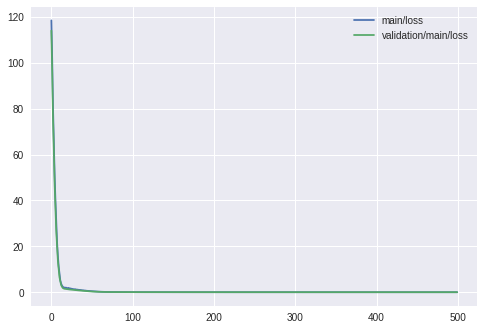

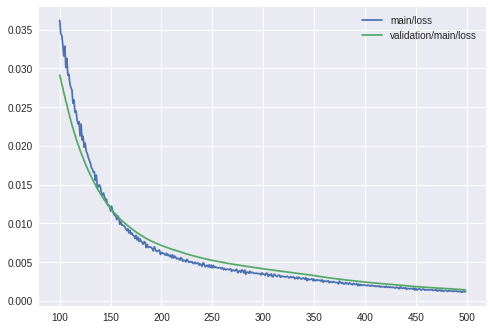

In [268]:
import json

with open('result/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()


result[['main/loss','validation/main/loss']].plot()

result = result.iloc[100:,:]
result[['main/loss','validation/main/loss']].plot()


In [285]:
x = np.array([20, 99])
x = x.reshape(1, len(x))
x = np.array(x, dtype=np.float32)
y = model.predictor(x)
print('predict={}'.format(y.data[0]))

predict=[119.03782]
